# Visualisations in LIME

In this notebook I attempt to get visualisations using LIME of what my model2 model is picking up on.  I have low hopes of what I'll be able to achieve here as I don't quite understand lime yet...

In [5]:
import os, shutil
import pandas as pd
import numpy as np
import random
np.random.seed(123)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping

parent_dir = '../../'

from skimage.io import imread
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image

### Load Previous Model:  model2

In [6]:
loaded_model = load_model(parent_dir + 'models/model2',
                          custom_objects=None, compile=True)
loaded_model

### Create Image Paths

In [7]:
train_dir = parent_dir + 'data/seg_train'
validation_dir = parent_dir + 'data/seg_val'
test_dir = parent_dir + 'data/seg_test'

In [8]:
def get_paths(directory):
    buildings_list = os.listdir(directory + '/buildings')
    forest_list = os.listdir(directory + '/forest')
    glacier_list = os.listdir(directory + '/glacier')
    mountain_list = os.listdir(directory + '/mountain')
    sea_list = os.listdir(directory + '/sea')
    street_list = os.listdir(directory + '/street')

    buildings_labels = [0 for img in buildings_list]
    forest_labels = [1 for img in forest_list]
    glacier_labels = [2 for img in glacier_list]
    mountain_labels = [3 for img in mountain_list]
    sea_labels = [4 for img in sea_list]
    street_labels = [5 for img in street_list]
    
    labels = buildings_labels + forest_labels + glacier_labels + mountain_labels + sea_labels + street_labels

    buildings_path = [directory + '/buildings/'+ img_id for img_id in buildings_list]
    forest_path = [directory + '/forest/'+ img_id for img_id in forest_list]
    glacier_path = [directory + '/glacier/'+ img_id for img_id in glacier_list]
    mountain_path = [directory + '/mountain/'+ img_id for img_id in mountain_list]
    sea_path = [directory + '/sea/'+ img_id for img_id in sea_list]
    street_path = [directory + '/street/'+ img_id for img_id in street_list]
    
    path_list = buildings_path + forest_path + glacier_path + mountain_path + sea_path + street_path
    
    directory_df = pd.DataFrame(path_list, columns = ['image_path'])
    directory_df['image_label'] = labels

    return path_list, labels, directory_df

In [9]:
train_path_list, train_labels, train_df = get_paths(train_dir)

### Perform Image Preprocessing

In [10]:
def preprocess_image(path_list):
    output = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = np.divide(x, 255.0)
        output.append(x)
    return np.vstack(output)

In [11]:
images = preprocess_image(train_path_list)
images[0].shape

(299, 299, 3)

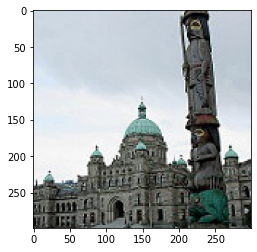

In [16]:
building_test = images[1024]
plt.imshow(building_test);

In [22]:
def new_predict_fn(images):
    images = convert_to_1channel(images)
    return loaded_model.predict(images)

In [19]:
# Instantiate the LimeImageExplainer()
explainer = lime_image.LimeImageExplainer()

In [26]:
explanation = explainer.explain_instance(building_test, loaded_model.predict,
                                         top_labels=None, hide_color=None,
                                         num_samples=1000)

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (10, 299, 299, 3)